# Content Based Filtering
Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.


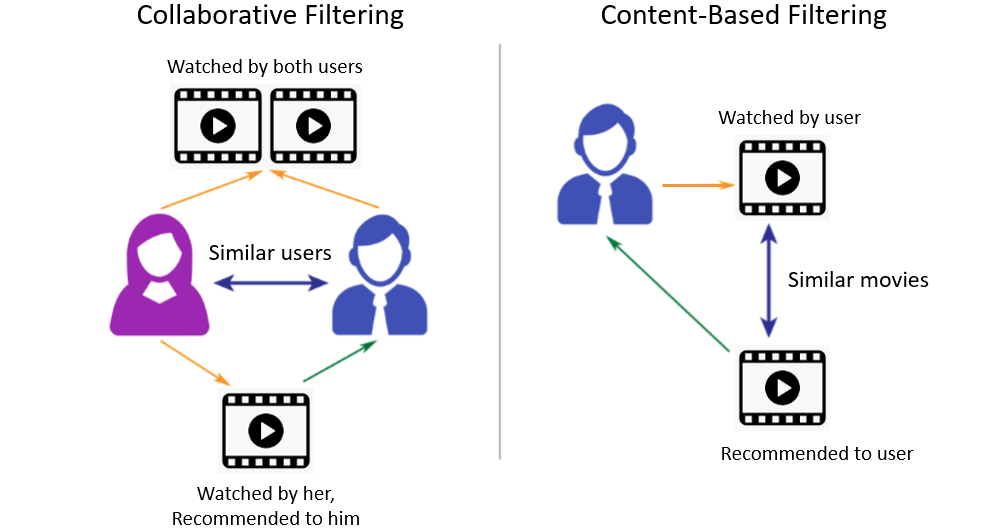

## Reference
- https://developers.google.com/machine-learning/recommendation/content-based/basics
- https://www.dicoding.com/academies/319/tutorials/19657 (Content Based Filtering - Machine Learning Terapan)
- https://github.com/reevald/movie-recommender-system/tree/main/content-based-filtering

In [33]:
!pip install opendatasets

In [34]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset'
od.download('https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset')

Skipping, found downloaded files in "./book-recommendation-dataset" (use force=True to force download)


In [35]:
import pandas as pd
# read dataset

books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')

<ipython-input-35-73f60ccd6a98>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Pada dataframe books terdapat 271360 baris dan 8 kolom variabel

In [4]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [36]:
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

## Feature Selection

To be more efficient when computing similarity, in this demo we will evaluate only books with year of publication is 1980.

In [15]:
data = books[books["Year-Of-Publication"] == 1980].astype(str)
data = data[["Book-Title", "Book-Author"]].drop_duplicates("Book-Title")
data

,Book-Title,Book-Author
65,The yawning heights,Aleksandr Zinoviev
178,Der KÃ?Â¶nig in Gelb.,Raymond Chandler
462,Feminism and Suffrage: The Emergence of an Ind...,Ellen Carol Dubois
742,African Women: Their Struggle for Economic Ind...,Christine Obbo
865,Titan,John Varley
...,...,...
270714,Nocturnes for the King of Naples,Edmund White
270926,Radiance,Anne Maybury
270964,FRANCHISE AFFAIR,Josephine Tey
271124,Sword and the Satchel,Elizabeth Boyer


## Vectorization
Change words into numbers

Options:
- One-hot encoder (suitable for small unique words and weight each of words are balance)
- Count vectorizer (suitable if the number of word's appear is important for example in sentiment's analysis)
- TFIDF vectorizer (suitable for large number unique words)
- Custom (for example embedding each word first then aggregate the embedding vector)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data author
tf.fit(data['Book-Author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['aardema', 'aarle', 'aaron', ..., 'zinsser', 'zola', 'zukav'],
      dtype=object)

In [37]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Book-Author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1903, 2138)

In [39]:
print(tfidf_matrix)

  (0, 2134)	0.7071067811865476
  (0, 34)	0.7071067811865476
  (1, 333)	0.7142893406550518
  (1, 1638)	0.6998505110568767
  (2, 520)	0.6377442803035925
  (2, 303)	0.5252426600068529
  (2, 561)	0.5633847540082874
  (3, 1479)	0.7255771784525766
  (3, 352)	0.6881407981720002
  (4, 1996)	0.8517066154468909
  (4, 1002)	0.5240189321045584
  (5, 271)	0.814026711749228
  (5, 335)	0.5808274378494347
  (6, 257)	0.7389438770236633
  (6, 1926)	0.6737669824273351
  (7, 1733)	0.8438822774899891
  (7, 2083)	0.5365283792478354
  (8, 645)	0.731738186282175
  (8, 1060)	0.6815858175875382
  (9, 383)	0.7071067811865476
  (9, 635)	0.7071067811865476
  (10, 1325)	0.7376442470774064
  (10, 74)	0.6751895768994115
  (11, 1196)	0.7071067811865476
  (11, 1633)	0.7071067811865476
  :	:
  (1889, 880)	0.5460962426354127
  (1890, 124)	0.7775935392379327
  (1890, 992)	0.6287672762918134
  (1891, 694)	1.0
  (1892, 241)	0.7389438770236633
  (1892, 802)	0.6737669824273351
  (1893, 65)	0.7071067811865476
  (1893, 1542)	0.

In [40]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
tfidf_matrix.shape

(1903, 2138)

## Similarity

Options:
- Jaccard Similarity
- Cosine Similarity
- Euclidean Similarity
- etc

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Book-Title'], columns=data['Book-Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df

Shape: (1903, 1903)


Book-Title,The yawning heights,Der KÃ?Â¶nig in Gelb.,"Feminism and Suffrage: The Emergence of an Independent Women's Movement in America, 1848-1869",African Women: Their Struggle for Economic Independence,Titan,Post Office,Sword of Shannara,On language,Die Nadel,The Habit of Being,...,Nurse,The Pocket Guide to Astronomy (A Fireside book),Astrological Insights into Personality,The Infinitive of Go,Le Sang noir,Nocturnes for the King of Naples,Radiance,FRANCHISE AFFAIR,Sword and the Satchel,The gift-giver
Book-Title,,,,,,,,,,,,,,,,,,,,,
The yawning heights,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Der KÃ?Â¶nig in Gelb.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Feminism and Suffrage: The Emergence of an Independent Women's Movement in America, 1848-1869",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
African Women: Their Struggle for Economic Independence,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Titan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.266784,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nocturnes for the King of Naples,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
Radiance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
FRANCHISE AFFAIR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


## Get Recommendation

In [42]:
data.sample(5)

,Book-Title,Book-Author
180474,Faith without fantasy,Robert M McMillan
166610,Dead in the Morning (Collins English Library L...,Jane Homeshaw
26935,Jailbird,Kurt Vonnegut
132095,"The Golden Horn (Last Viking, No 1)",Poul Anderson
268887,The Preacher Had 10 Kids,Frances Bradsher


In [43]:
def author_recommendations(title, similarity_data=cosine_sim_df, items=data[['Book-Title', 'Book-Author']], k=5):
  index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(title, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

In [44]:
# mengecek berdasarkan judul buku
data[data["Book-Title"].eq('Feed Your Kids Right')]

,Book-Title,Book-Author
78300,Feed Your Kids Right,Lendon H. Smith


In [45]:
# Mendapatkan rekomendasi judul buku berdasarkan nama penulis (author) dari buku yang berjudul Deception Point
author_recommendations('Feed Your Kids Right')

,Book-Title,Book-Author
0,The encyclopedia of baby and child care,Lendon H Smith
1,Creation of Life,A. E. Smith
2,The Dieter's Guide to Weight Loss After Sex,Richard Smith
3,The Rogues,George Smith
4,Crystal Power (Llewellyn's Psi-tech series),Michael G. Smith
